In [120]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
# we want our plots to appear inside the notebook
%matplotlib inline
from matplotlib.pyplot import figure
import json
import pickle
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import learning_curve #LearningCurveDisplay, ShuffleSplit

In [121]:
import pandas as pd
from sklearn.feature_selection import RFE
import numpy as np
from imblearn.over_sampling import SMOTE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import detrend
import sys
import seaborn as sns
import sklearn
from mlxtend.plotting import plot_learning_curves
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import random
import scipy.stats as stats
import statsmodels.api as sm
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import learning_curve
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import roc_auc_score

## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [122]:
#Read
df= pd.read_csv('/Users/cyrilleetude/Desktop/BureauMacBookAirdeCyrille/Semester_Project_Cyrille_2022/MachineLEARNING/DATASET.csv')

#Clean
    #Drop irrelevant column
df.drop(df.columns[[0]], axis=1, inplace=True) #unnamed
 
    #Save column names
column_list = list(df.columns)

df.shape

(393, 47)

Before SMOTE :  (393, 47)


<AxesSubplot:xlabel='index', ylabel='Category Encoded (0 = Non Fallers | 1 = Fallers)'>

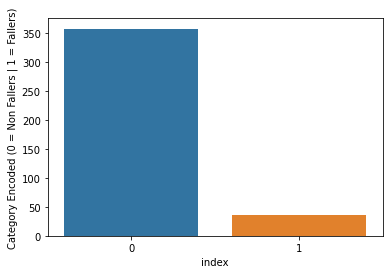

In [123]:
    # Check balance
        # Pre-Check
xx=df['Category Encoded (0 = Non Fallers | 1 = Fallers)'].value_counts().reset_index()
print('Before SMOTE : ', df.shape)
display(sns.barplot(x = "index", y = "Category Encoded (0 = Non Fallers | 1 = Fallers)", data=xx))
#         # SMOTE
#         #     Define features and target
# y= df.iloc[:,-1:]#target
# X = df.iloc[:,0:-1].values#MinMaxScaler().fit(df.iloc[:,0:-1]).transform(df.iloc[:,0:-1])#Scaled features
#             # Run SMOTE
# smote = SMOTE()
# X, y = smote.fit_resample(X, y)

# df = pd.concat([pd.DataFrame(X), y], axis=1)
#         # Re-Check
# xx_2=df['Category Encoded (0 = Non Fallers | 1 = Fallers)'].value_counts().reset_index()
# print('After SMOTE: ', df.shape)
# display(sns.barplot(x = "index", y = "Category Encoded (0 = Non Fallers | 1 = Fallers)", data=xx_2))
#         # relabel the columns
# df.columns = column_list

#         # re-binarize the column that need to stay binary
# df["Falls12m"] =  [float(np.round(i)) for i in df["Falls12m"].to_list()]
# df['Best_T'] = [float(np.round(i)) for i in df["Best_T"].to_list()]
# df['FES_T'] = [float(np.round(i)) for i in df["FES_T"].to_list()]
# df["AgeGroup(0=young|1=old)"] = [float(np.round(i)) for i in df["AgeGroup(0=young|1=old)"].to_list()]
# df["Gender(0=F|1=M)"] = [float(np.round(i)) for i in df["Gender(0=F|1=M)"].to_list()]
# df["IPAQ_S"] = [float(np.round(i)) for i in df["IPAQ_S"].to_list()]


### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do ths using `df.corr()` which will create a [correlation matrix](https://www.statisticshowto.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is to other.

In [124]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Area (m^2)_fc,Range AP (m)_fc,Range ML (m)_fc,Sway Length AP (m)_fc,Sway Length ML (m)_fc,Mean Velocity AP (m/s)_fc,Mean Velocity ML (m/s)_fc,RMS Acc AP (g)_fc,RMS Acc ML (g)_fc,Area (m^2)_fo,...,Height,Weight,BMI,Falls12m,Best_T,FES_T,AgeGroup(0=young|1=old),Gender(0=F|1=M),IPAQ_S,Category Encoded (0 = Non Fallers | 1 = Fallers)
Area (m^2)_fc,1.000000,0.827799,0.881258,0.698024,0.701586,0.698024,0.701586,0.544806,0.500679,0.159888,...,-0.078284,-0.011519,0.050268,0.395671,-0.170463,-0.034320,0.175162,-0.025698,-0.065725,0.424038
Range AP (m)_fc,0.827799,1.000000,0.641899,0.706526,0.591558,0.706526,0.591558,0.511399,0.464619,0.130644,...,-0.054047,-0.006951,0.033185,0.299281,-0.137927,-0.015455,0.111573,0.001784,-0.033182,0.313434
Range ML (m)_fc,0.881258,0.641899,1.000000,0.673920,0.755233,0.673920,0.755233,0.578208,0.558522,0.169716,...,-0.055942,0.009962,0.047875,0.372245,-0.156822,-0.054320,0.174857,0.002241,-0.044239,0.398020
Sway Length AP (m)_fc,0.698024,0.706526,0.673920,1.000000,0.754442,1.000000,0.754442,0.892303,0.684314,0.130951,...,-0.059205,0.014626,0.054264,0.278392,-0.099496,-0.023479,0.099090,-0.036671,-0.045751,0.294696
Sway Length ML (m)_fc,0.701586,0.591558,0.755233,0.754442,1.000000,0.754442,1.000000,0.702300,0.890901,0.128943,...,-0.053301,-0.006294,0.031581,0.218137,-0.092155,-0.042372,0.110196,0.018273,-0.082497,0.251151
Mean Velocity AP (m/s)_fc,0.698024,0.706526,0.673920,1.000000,0.754442,1.000000,0.754442,0.892303,0.684314,0.130951,...,-0.059205,0.014626,0.054264,0.278392,-0.099496,-0.023479,0.099090,-0.036671,-0.045751,0.294696
Mean Velocity ML (m/s)_fc,0.701586,0.591558,0.755233,0.754442,1.000000,0.754442,1.000000,0.702300,0.890901,0.128943,...,-0.053301,-0.006294,0.031581,0.218137,-0.092155,-0.042372,0.110196,0.018273,-0.082497,0.251151
RMS Acc AP (g)_fc,0.544806,0.511399,0.578208,0.892303,0.702300,0.892303,0.702300,1.000000,0.695344,0.158022,...,-0.076271,0.026195,0.081979,0.232282,-0.100917,-0.033775,0.120857,-0.032878,-0.051074,0.247307
RMS Acc ML (g)_fc,0.500679,0.464619,0.558522,0.684314,0.890901,0.684314,0.890901,0.695344,1.000000,0.089179,...,-0.056700,0.023313,0.067172,0.133432,-0.061952,-0.050673,0.088289,0.002413,-0.093581,0.162889
Area (m^2)_fo,0.159888,0.130644,0.169716,0.130951,0.128943,0.130951,0.128943,0.158022,0.089179,1.000000,...,-0.103152,-0.063341,0.027614,0.361961,-0.098732,-0.017995,0.097620,-0.085906,-0.065371,0.366445


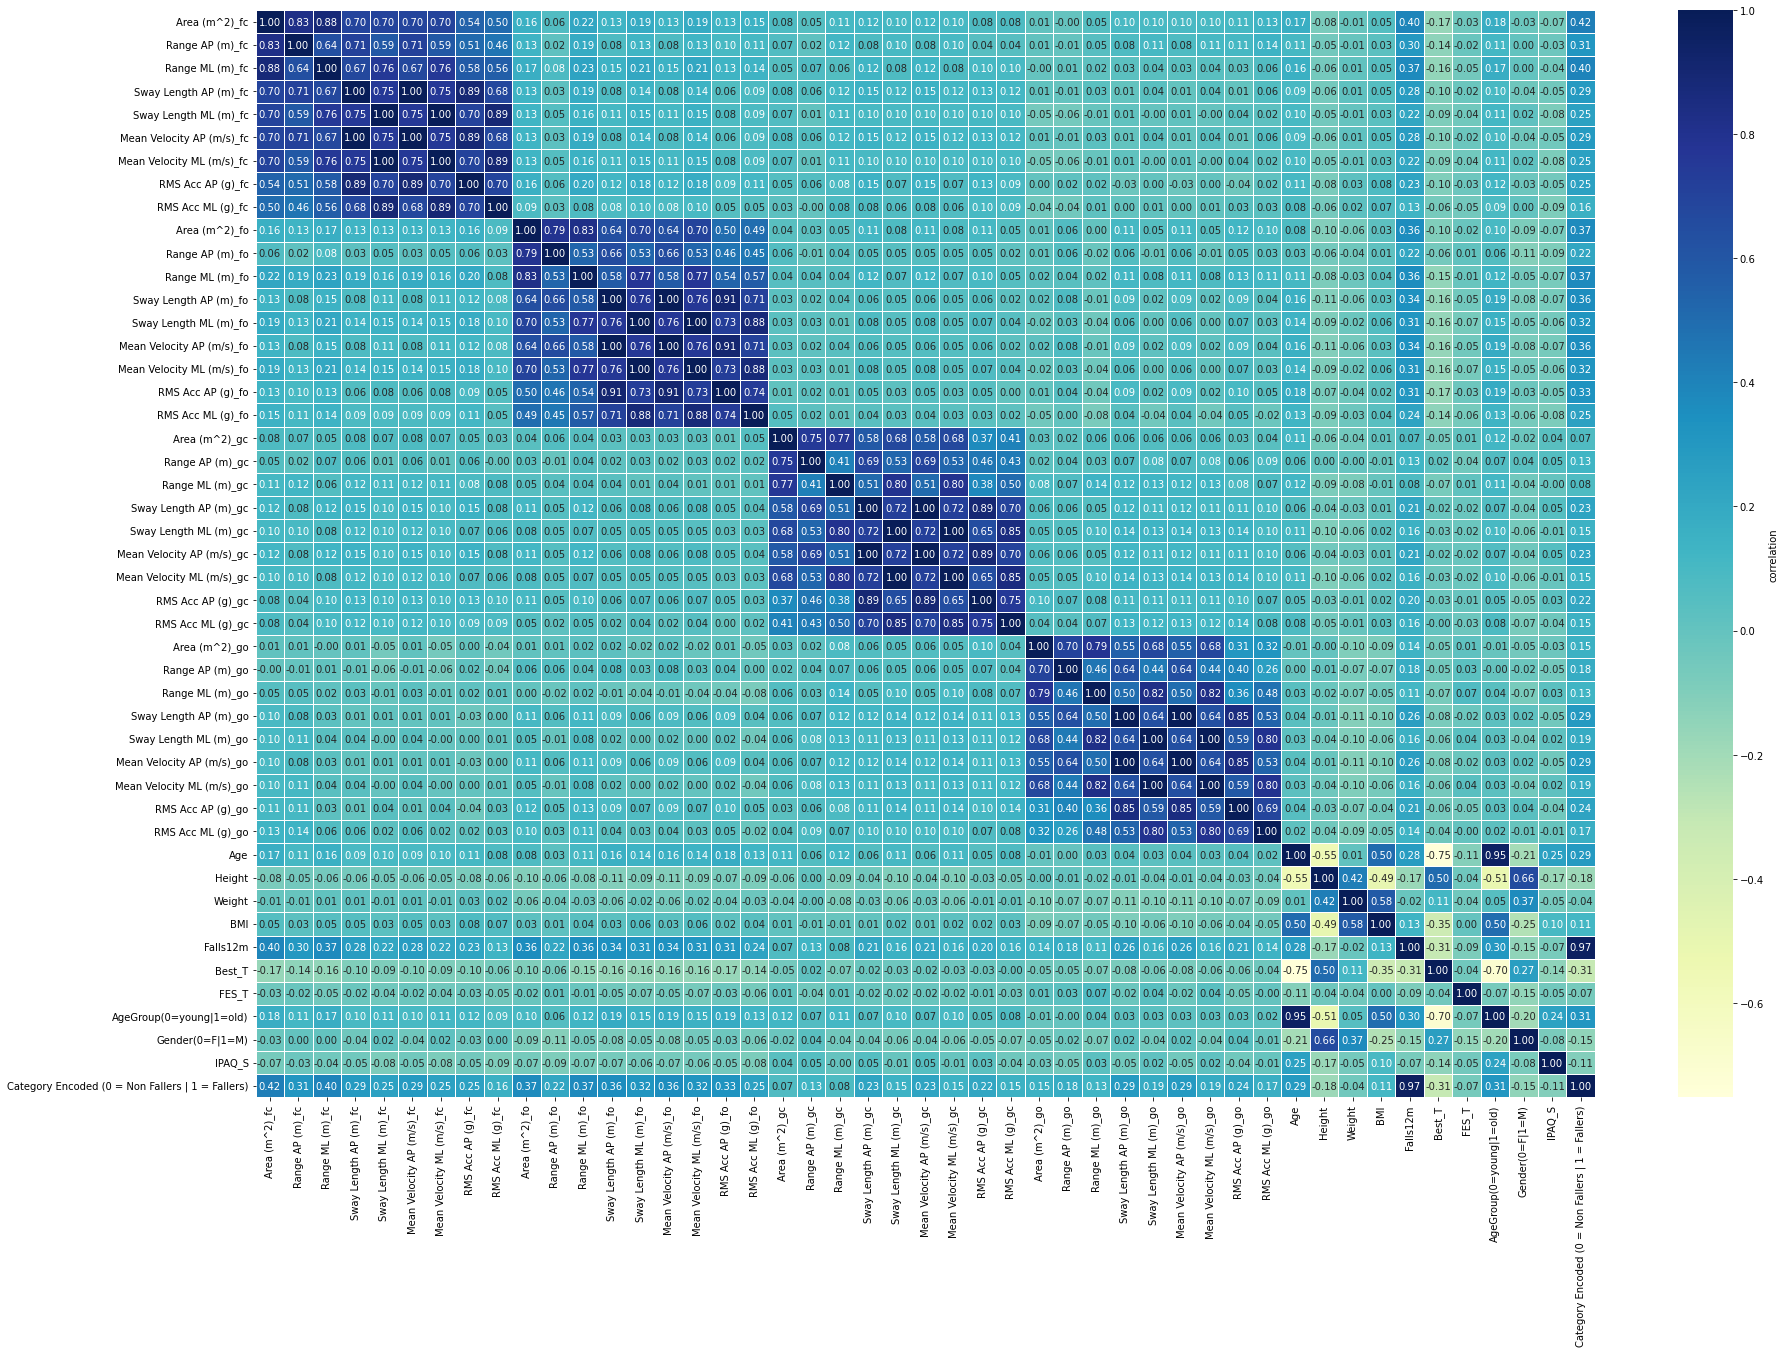

In [125]:
# let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu", cbar_kws={'label': 'correlation'})
                #  ,cmap="BrBG",annot=True,  cbar_kws={'label': 'correlation'}

Let's see our new variables.

## 6. Experimentation LR

In [126]:
#Target & features
# Feature 
X = df.drop("Category Encoded (0 = Non Fallers | 1 = Fallers)", axis=1)
X = X.values#MinMaxScaler().fit(X).transform(X)#
# Target variable
y = df["Category Encoded (0 = Non Fallers | 1 = Fallers)"].values


# Initial TT split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

# cv
cv = RepeatedKFold(n_splits=10, n_repeats=5)#, random_state=1)




In [127]:
# # Optimize categorical HP with GridSearch 

# warnings.filterwarnings('ignore')
# # parameter grid
# parameters = {
#     'penalty' : ['l1','l2', 'elasticnet', None], 
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear','newton-cholesky', 'sag', 'saga'],
#     'dual'    : [True, False],
#     'fit_intercept': [True, False],
#     'class_weight':['balanced', None],
#     'multi_class': ['auto', 'ovr', 'multinomial'],
#     'warm_start': [True, False],
#     'n_jobs' : [-1, None]
# }
# logreg = LogisticRegression()
# clf = GridSearchCV(logreg,                    # model
#                    param_grid = parameters,   # hyperparameters
#                    scoring='accuracy',        # metric for scoring
#                    cv=cv)                     # number of folds
# # scoring='roc_auc',
# clf.fit(X_train,y_train)
# print("Tuned Hyperparameters :", clf.best_params_)
# print("Accuracy :",clf.best_score_)


In [128]:
# #  Optimize continuous HP Validation curve using CV HP categorical Parameter

# ### SAME
# # Unscaled param: {'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'multi_class': 'auto', 
# # 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}

# # Scaled param: {class_weight = 'balanced', multi_class= 'auto',
# # dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', warm_start=True, n_jobs=-1}
# ### SAME


# Parameter_of_interest_C = 'C'
# # Setting the range for the parameter
# # parameter_range = np.arange(0, 201, 10)
# parameter_range_C = [10**(-i) for i in range(11)]
 
# # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# train_score_C, test_score_C = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', warm_start=True, n_jobs=-1), X, y,
#                                        param_name = Parameter_of_interest_C, param_range = parameter_range_C, cv= cv,
#                                        scoring = "accuracy")
 
# # Calculating mean and standard deviation of training score
# mean_train_score_C = np.mean(train_score_C, axis = 1)
# std_train_score_C = np.std(train_score_C, axis = 1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_score_C = np.mean(test_score_C, axis = 1)
# std_test_score_C = np.std(test_score_C, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range_C, mean_train_score_C,
#      label = "Training Score", color = 'b')
# plt.plot(parameter_range_C, mean_test_score_C,
#    label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
# plt.title("Validation Curve with Logistic Regression Classifier")
# plt.xlabel(Parameter_of_interest_C+'_value')
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()
# print('Best', Parameter_of_interest_C+'_value is 0.2')





# Parameter_of_interest_tol = 'tol'
# # Setting the range for the parameter
# # parameter_range = np.arange(0, 201, 10)
# parameter_range_tol = [10**(-i) for i in range(11)]
 
# # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# train_score_tol, test_score_tol = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', n_jobs=-1), X, y,
#                                        param_name = Parameter_of_interest_tol, param_range = parameter_range_tol, cv= cv,
#                                        scoring = "accuracy")
 
# # Calculating mean and standard deviation of training score
# mean_train_score_tol = np.mean(train_score_tol, axis = 1)
# std_train_score_tol = np.std(train_score_tol, axis = 1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_score_tol = np.mean(test_score_tol, axis = 1)
# std_test_score_tol = np.std(test_score_tol, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range_tol, mean_train_score_tol,
#      label = "Training Score", color = 'b')
# plt.plot(parameter_range_tol, mean_test_score_tol,
#    label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
# plt.title("Validation Curve with Logistic Regression Classifier")
# plt.xlabel(Parameter_of_interest_tol+'_value')
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()
# print('Best', Parameter_of_interest_tol+'_value is', 10**(-4))







# Parameter_of_interest_intercept_scaling = 'intercept_scaling'
# # Setting the range for the parameter
# parameter_range_intercept_scaling = np.arange(-10, 11, 1)
 
# # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# train_score_intercept_scaling, test_score_intercept_scaling = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', n_jobs=-1), X, y,
#                                        param_name = Parameter_of_interest_intercept_scaling, param_range = parameter_range_intercept_scaling, cv= cv,
#                                        scoring = "accuracy")
 
# # Calculating mean and standard deviation of training score
# mean_train_score_intercept_scaling = np.mean(train_score_intercept_scaling, axis = 1)
# std_train_score_intercept_scaling = np.std(train_score_intercept_scaling, axis = 1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_score_intercept_scaling = np.mean(test_score_intercept_scaling, axis = 1)
# std_test_score_intercept_scaling = np.std(test_score_intercept_scaling, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range_intercept_scaling, mean_train_score_intercept_scaling,
#      label = "Training Score", color = 'b')
# plt.plot(parameter_range_intercept_scaling, mean_test_score_intercept_scaling,
#    label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
# plt.title("Validation Curve with Logistic Regression Classifier")
# plt.xlabel(Parameter_of_interest_intercept_scaling+'_value')
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()
# print('Best', Parameter_of_interest_intercept_scaling+'_value is 1')







# Parameter_of_interest_max_iter = "max_iter"
# # Setting the range for the parameter
# parameter_range_max_iter = np.arange(50, 251, 25)
 
# # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# train_score_max_iter, test_score_max_iter = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', n_jobs=-1), X, y,
#                                        param_name = Parameter_of_interest_max_iter, param_range = parameter_range_max_iter, cv= cv,
#                                        scoring = "accuracy")
 
# # Calculating mean and standard deviation of training score
# mean_train_score_max_iter = np.mean(train_score_max_iter, axis = 1)
# std_train_score_max_iter = np.std(train_score_max_iter, axis = 1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_score_max_iter = np.mean(test_score_max_iter, axis = 1)
# std_test_score_max_iter = np.std(test_score_max_iter, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range_max_iter, mean_train_score_max_iter,
#      label = "Training Score", color = 'b')
# plt.plot(parameter_range_max_iter, mean_test_score_max_iter,
#    label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
# plt.title("Validation Curve with Logistic Regression Classifier")
# plt.xlabel(Parameter_of_interest_max_iter+'_value')
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()
# print('Best', Parameter_of_interest_max_iter+'_value is 100')





# Parameter_of_interest_verbose = "verbose"
# # # Setting the range for the parameter
# # parameter_range_verbose = np.arange(0, 3, 1)
 
# # # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# # train_score_verbose, test_score_verbose = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# # dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', n_jobs=-1), X, y,
# #                                        param_name = Parameter_of_interest_verbose, param_range = parameter_range_verbose, cv= cv,
# #                                        scoring = "accuracy")
 
# # # Calculating mean and standard deviation of training score
# # mean_train_score_verbose = np.mean(train_score_verbose, axis = 1)
# # std_train_score_verbose = np.std(train_score_verbose, axis = 1)
 
# # # Calculating mean and standard deviation of testing score
# # mean_test_score_verbose = np.mean(test_score_verbose, axis = 1)
# # std_test_score_verbose = np.std(test_score_verbose, axis = 1)
 
# # # Plot mean accuracy scores for training and testing scores
# # plt.plot(parameter_range_verbose, mean_train_score_verbose,
# #      label = "Training Score", color = 'b')
# # plt.plot(parameter_range_verbose, mean_test_score_verbose,
# #    label = "Cross Validation Score", color = 'g')
 
# # # Creating the plot
# # plt.title("Validation Curve with Logistic Regression Classifier")
# # plt.xlabel(Parameter_of_interest_verbose+'_value')
# # plt.ylabel("Accuracy")
# # plt.tight_layout()
# # plt.legend(loc = 'best')
# # plt.show()
# print('Best', Parameter_of_interest_verbose+'_value is 0')

In [129]:
# # Add new Parameters and tune the randomness of LR 
# Parameter_of_interest_random_state = 'random_state'
# # Setting the range for the parameter
# parameter_rangerandom_state = np.arange(0, 101, 1)
 
# # # Calculate accuracy on training and test set using the gamma parameter with 5 times 10-fold cross validation
# train_scorerandom_state, test_scorerandom_state = validation_curve(LogisticRegression(class_weight = 'balanced', multi_class= 'auto',
# dual= False, fit_intercept= True, penalty= 'l1', solver= 'liblinear', C= 0.2, tol=0.0001, intercept_scaling=1, max_iter=100, verbose=0, n_jobs=-1), X, y,
#                                        param_name = Parameter_of_interest_random_state, param_range = parameter_rangerandom_state, cv= cv,
#                                        scoring = "accuracy")
 
# # Calculating mean and standard deviation of training score
# mean_train_scorerandom_state = np.mean(train_scorerandom_state, axis = 1)
# std_train_scorerandom_state = np.std(train_scorerandom_state, axis = 1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_scorerandom_state = np.mean(test_scorerandom_state, axis = 1)
# std_test_scorerandom_state = np.std(test_scorerandom_state, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_rangerandom_state, mean_train_scorerandom_state,
#      label = "Training Score", color = 'b')
# plt.plot(parameter_rangerandom_state, mean_test_scorerandom_state,
#    label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
# plt.title("Validation Curve with Logistic Regression Classifier")
# plt.xlabel(Parameter_of_interest_random_state+'_value')
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()
# print('Best', Parameter_of_interest_random_state+'_value is 37')

In [130]:
# GridSeach final
final_model = LogisticRegression()
final_parameters= {'class_weight' :['balanced'], 'multi_class': ['auto'], 'dual': [False], 'fit_intercept': [True],
 'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.036], 'tol':[0.0001], 'intercept_scaling':[1], 'max_iter':[100], 'verbose':[0],
  'random_state':[37], 'n_jobs':[-1]} #'C': [0.036]
final_clf = GridSearchCV(final_model,                    # model
                   param_grid = final_parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds
final_clf.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.f

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.036], 'class_weight': ['balanced'],
                         'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [100],
                         'multi_class': ['auto'], 'n_jobs': [-1],
                         'penalty': ['l1'], 'random_state': [37],
                         'solver': ['liblinear'], 'tol': [0.0001],
                         'verbose': [0]},
             scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

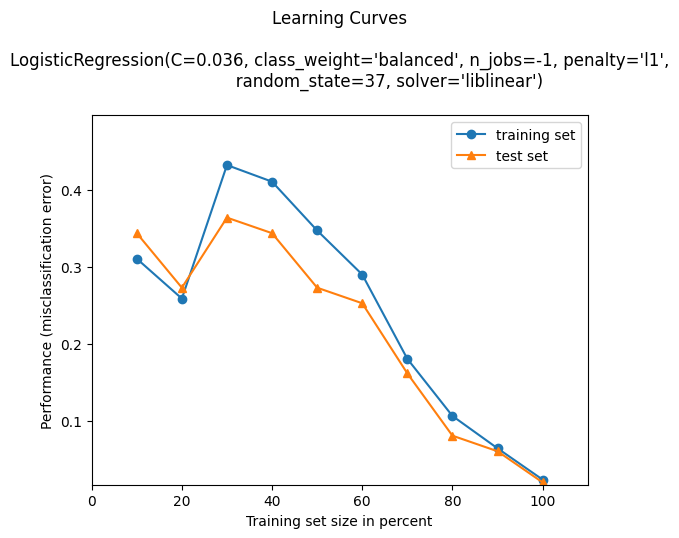

In [131]:
#Plot loss with final HP 
LogisticRegression_Model = LogisticRegression( class_weight='balanced', multi_class= 'auto', dual=False, fit_intercept= True, penalty='l1', solver='liblinear',
                                                C=0.036, tol=0.0001, intercept_scaling=1, max_iter=100, verbose=0, random_state=37, n_jobs=-1).fit(X_train,y_train) #cv= cv,
                                              
plot_learning_curves(X_train, y_train, X_test, y_test, LogisticRegression_Model)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

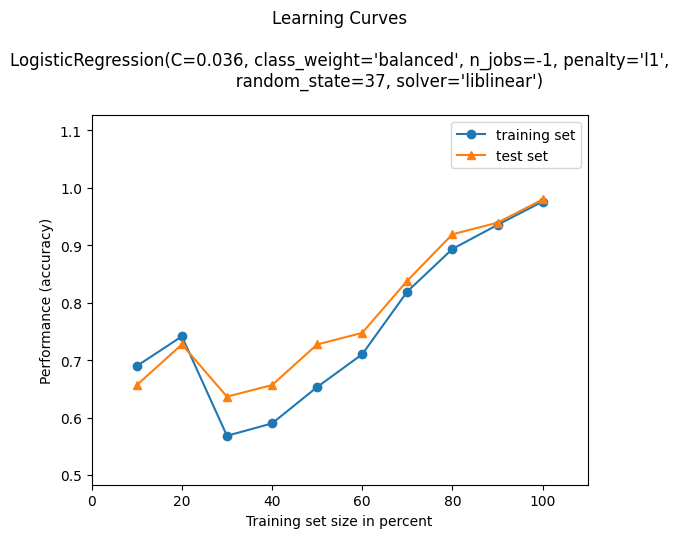

In [132]:
# Plot Accuracy Curve
plot_learning_curves(X_train, y_train, X_test, y_test, LogisticRegression_Model, scoring='accuracy')
plt.show()

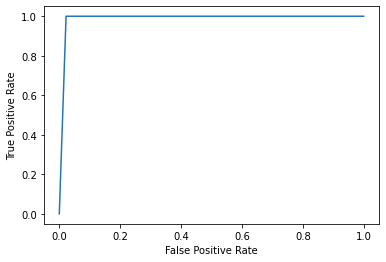

In [133]:
# Model Performance
y_pred_test = LogisticRegression_Model.predict(X_test)
y_pred_train = LogisticRegression_Model.predict(X_train)

# Accuracy 
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)

# Specificity
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,y_pred_test).ravel()
specificity_test = tn_test / (tn_test+fp_test)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,y_pred_train).ravel()
specificity_train = tn_train / (tn_train+fp_train)

# Sensitivity 
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,y_pred_test).ravel()
sensitivity_test = tp_test / (tp_test+fn_test)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,y_pred_train).ravel()
sensitivity_train = tp_train / (tp_train+fn_train)


# Precision
precision_test = precision_score(y_test,y_pred_test)
precision_train = precision_score(y_train,y_pred_train)

# NPV
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,y_pred_test).ravel()
NPV_test = tn_test / (tn_test+fp_test)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,y_pred_train).ravel()
NPV_train = tn_train / (tn_train+fp_train)

# PPV
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,y_pred_test).ravel()
PPV_test = tp_test / (tp_test+fp_test)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,y_pred_train).ravel()
PPV_train = tp_train / (tp_train+fp_train)

# AUROC 

auroc_test = roc_auc_score(y_test,y_pred_test)
auroc_train = roc_auc_score(y_train,y_pred_train)
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_pred_test)


In [134]:
score = pd.DataFrame(np.array([['Logistic regression', auroc_train, accuracy_train, specificity_train, sensitivity_train, precision_train
                                ,PPV_train, NPV_train, auroc_test, accuracy_test, specificity_test, sensitivity_test, precision_test
                                ,PPV_test, NPV_test]]))
score.columns = ['Label', 'auroc_train', 'accuracy_train', 'specificity_train', 'sensitivity_train (recall)', 'precision_train', 'PPV_train', 
'NPV_train', 'auroc_test', 'accuracy_test', 'specificity_test', 'sensitivity_test (recall)', 'precision_test', 'PPV_test', 'NPV_test']
score.to_csv('/Users/cyrilleetude/Desktop/BureauMacBookAirdeCyrille/Semester_Project_Cyrille_2022/MachineLEARNING/Models/LR.csv')
score

,Label,auroc_train,accuracy_train,specificity_train,sensitivity_train (recall),precision_train,PPV_train,NPV_train,auroc_test,accuracy_test,specificity_test,sensitivity_test (recall),precision_test,PPV_test,NPV_test
0,Logistic regression,0.9868913857677903,0.9761904761904762,0.9737827715355806,1.0,0.7941176470588235,0.7941176470588235,0.9737827715355806,0.9888888888888888,0.9797979797979798,0.9777777777777777,1.0,0.8181818181818182,0.8181818181818182,0.9777777777777777


In [135]:
LogisticRegression_Model.get_params()

{'C': 0.036,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': 37,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Feature: 0 Area (m^2)_fc Importance Score 0.0
Feature: 1 Range AP (m)_fc Importance Score 0.0
Feature: 2 Range ML (m)_fc Importance Score 0.0
Feature: 3 Sway Length AP (m)_fc Importance Score 0.0
Feature: 4 Sway Length ML (m)_fc Importance Score 0.0
Feature: 5 Mean Velocity AP (m/s)_fc Importance Score 0.0
Feature: 6 Mean Velocity ML (m/s)_fc Importance Score 0.0
Feature: 7 RMS Acc AP (g)_fc Importance Score 0.0
Feature: 8 RMS Acc ML (g)_fc Importance Score 0.0
Feature: 9 Area (m^2)_fo Importance Score 0.0
Feature: 10 Range AP (m)_fo Importance Score 0.0
Feature: 11 Range ML (m)_fo Importance Score 0.0
Feature: 12 Sway Length AP (m)_fo Importance Score 0.0
Feature: 13 Sway Length ML (m)_fo Importance Score 0.0
Feature: 14 Mean Velocity AP (m/s)_fo Importance Score 0.0
Feature: 15 Mean Velocity ML (m/s)_fo Importance Score 0.0
Feature: 16 RMS Acc AP (g)_fo Importance Score 0.0
Feature: 17 RMS Acc ML (g)_fo Importance Score 0.0
Feature: 18 Area (m^2)_gc Importance Score 0.0
Feature: 19 R

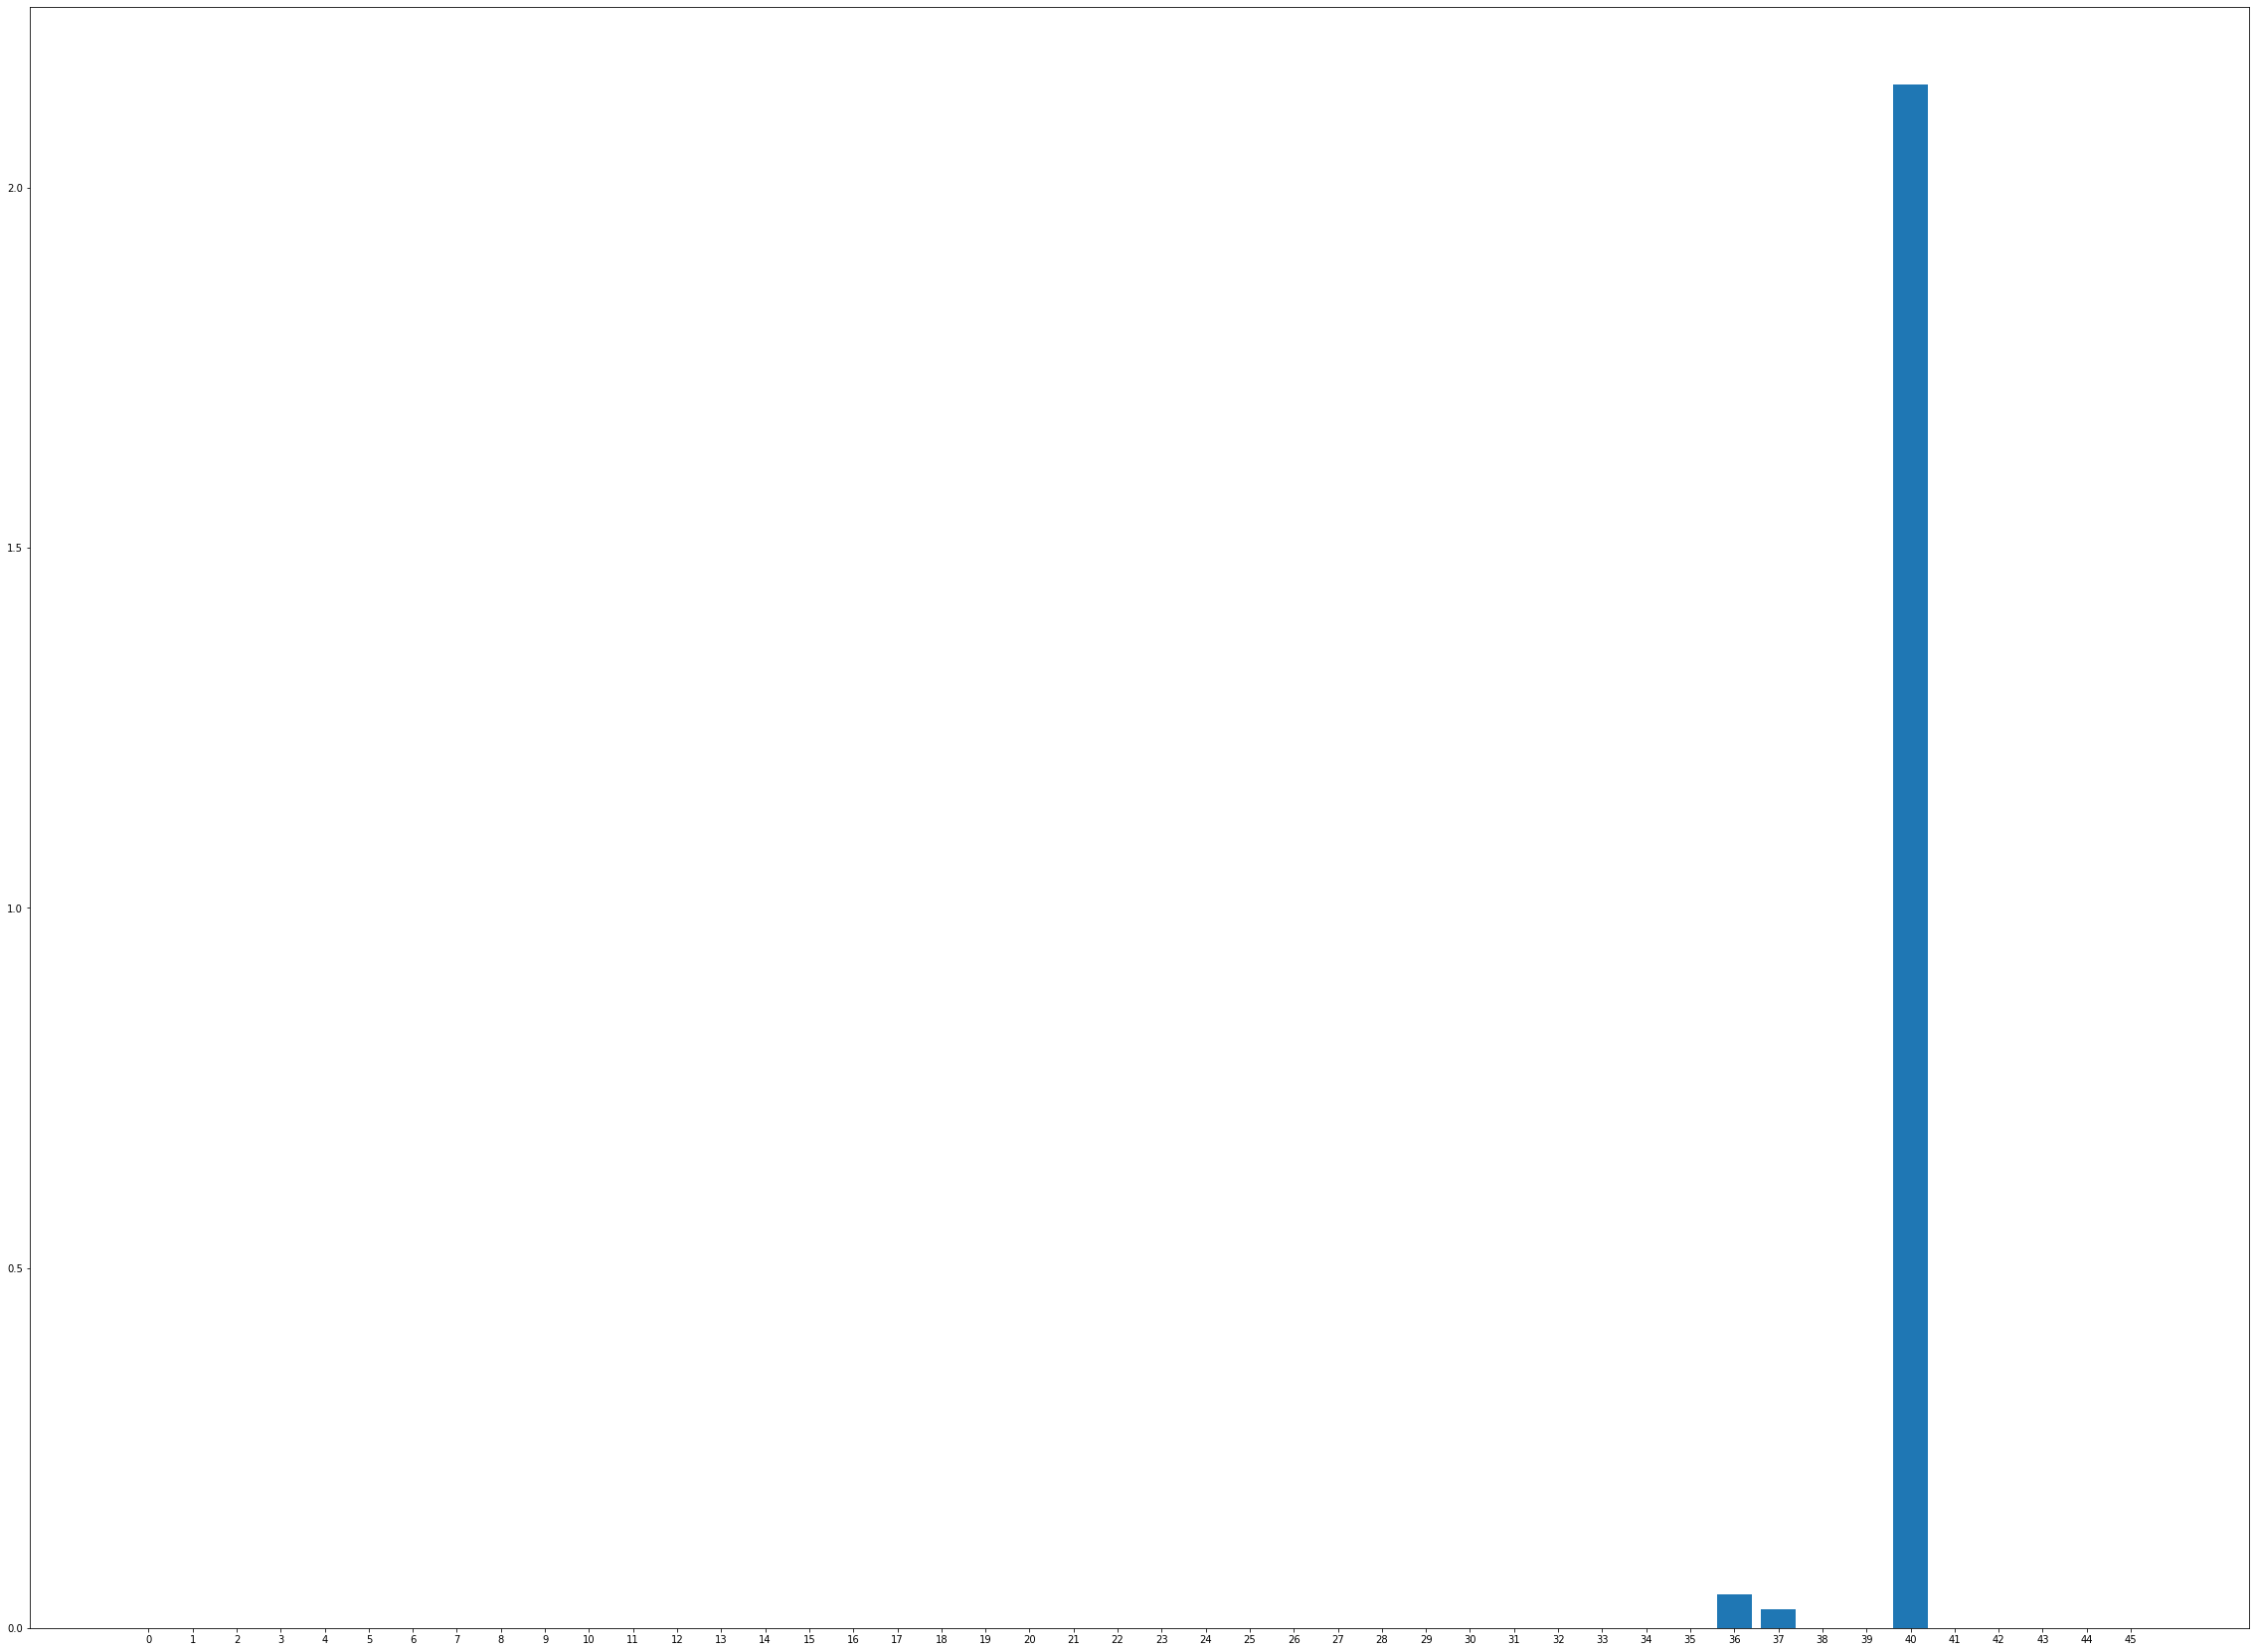

In [136]:
# get importance
importance = np.abs(LogisticRegression_Model.coef_[0])
features_names = list(df.drop("Category Encoded (0 = Non Fallers | 1 = Fallers)", axis=1).columns)
id = -1
# summarize feature importance
for i,v in zip(features_names, list(importance)):
    id=id+1
    print("Feature:", id, i, "Importance Score", v)
# plot feature importance
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)

plt.bar([x for x in range(len(features_names))], importance)
default_x_ticks = range(len(features_names))
# plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, [x for x in range(len(features_names))])
plt.show()

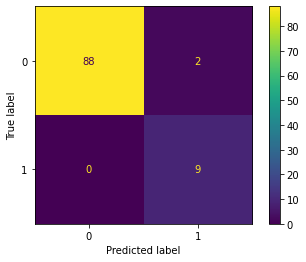

In [137]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=LogisticRegression_Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=LogisticRegression_Model.classes_)
disp.plot()

plt.show()

In [138]:
# SAVE 

with open ('/Users/cyrilleetude/Desktop/Bureau - MacBook Air de Cyrille/Semester_Project_Cyrille_2022/MachineLEARNING/Models/Saved_Models/LogisticRegression_Model.pkl' , 'wb') as file:
    pickle.dump(LogisticRegression_Model, file)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cyrilleetude/Desktop/Bureau - MacBook Air de Cyrille/Semester_Project_Cyrille_2022/MachineLEARNING/Models/Saved_Models/LogisticRegression_Model.pkl'

In [ ]:
with open('/Users/cyrilleetude/Desktop/Bureau - MacBook Air de Cyrille/Semester_Project_Cyrille_2022/MachineLEARNING/Models/Saved_Models/LogisticRegression_Model.pkl', 'rb') as file:  
    Loaded_Model = pickle.load(file)